# Sales Analysis


Import necessary libraries

In [8]:
import pandas as pd
import os

Task #1: merge 12 months of sales data into a single csv file

In [10]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)    
    
# all_months_data.head()

Read all data

In [11]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [13]:
# Drop rows of NAN
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

In [17]:
# Find or and delete it

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [27]:
# Convert columns to correct type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Augment data with additional columns

### Task 2: Add Month Column

In [28]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1
1,295666,LG Washing Machine,1,1,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1
2,295667,USB-C Charging Cable,1,1,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1
3,295668,27in FHD Monitor,1,1,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1
4,295669,USB-C Charging Cable,1,1,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1


### Task 3: Add a sales column

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1
1,295666,LG Washing Machine,1,1,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1
2,295667,USB-C Charging Cable,1,1,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1
3,295668,27in FHD Monitor,1,1,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1
4,295669,USB-C Charging Cable,1,1,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1


In [33]:
results = all_data.groupby('Month').sum()

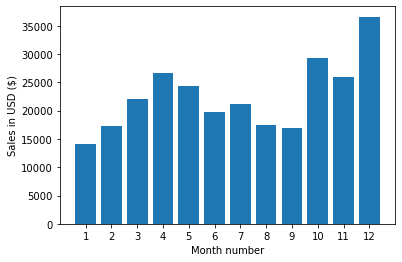

In [35]:
import matplotlib.pyplot as pit

months = range(1,13)

pit.bar(months, results['Sales'])
pit.xticks(months)
pit.ylabel('Sales in USD ($)')
pit.xlabel('Month number')

pit.show()